<a href="https://colab.research.google.com/github/Laxman-Kumar/ISCHOOL-LABS/blob/master/HW06_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

################################################
<h4>
IST 687, Standard Homework Heading

Student name: Laxman Kumar

Homework number: HW06

Date due: 03 October

Attribution statement: (choose the statements that are true)
1. I did this work by myself, with help from the book and the professor
2. I did this work with help from the book and the professor and R-studio help section 
</h4>


In [2]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library(ggplot2)

In [0]:
readStates <- function(filename,columnList){
  
  dfStates = read.csv(file=filename,stringsAsFactors=FALSE,sep=",")
  
  #Removing the bottom 7 rows from 60 to 66 and top 8 rows from 1 to 8 as they either contain null information or not usefull
  dfStates <- dfStates[-60:-66,]
  dfStates <- dfStates[-1:-8,]
  
  #Removing the last 5 columns of the dataframe as they contain null values
  dfStates <- dfStates[,-6:-10]
  
  colnames(dfStates) <- columnList
  
  #Removing the commas from numeric data column.
  #removing period from statename name 
  dfStates$stateName <- gsub("\\.", "", dfStates$stateName)
  #For columns census
  dfStates$Census <- as.numeric(gsub(",", "", dfStates$Census))
  
  #For columns Estimated
  dfStates$Estimated <- as.numeric(gsub(",", "", dfStates$Estimated))
  
  #For columns Pop2010
  dfStates$Pop2010 <- as.numeric(gsub(",", "", dfStates$Pop2010))
  
  #For columns Pop2011
  dfStates$Pop2011 <- as.numeric(gsub(",", "", dfStates$Pop2011))
  
  return (dfStates)
  
}
#file name
fileURL <- "nst-est2011-01.csv"
#vector of column headers
columnList <- c("stateName", "Census",  "Estimated", "Pop2010", "Pop2011")

<h2>Step 1: Explore the Merged Data – Understanding distributions</h2>
  

<h3>A.	Use the merged dataset created during this week’s prep work (mergedDF)</h3>

In [0]:
#using the function created in HW03 for importing and cleaning population csv file
states <- readStates(fileURL, columnList)

#importing USArrests dataset
arrests <- USArrests

#Adding a new column as statename and copying the data from rownames into the column cell
arrests$stateName <- rownames(arrests)

#Merging two dataframe by their statename into a third dataframe named mergeDF
mergeDF <- merge(states, arrests, by = "stateName")

<h3>B.	Create separate histograms using ggplot2() for the Pop2011, murder rate, assault and rape columns. Make sure each line of code is explained (comments) in terms of what it is doing. What parameter will you have to adjust to make the other histograms look right?</h3>

Ans: We have to adjust the number of bins for the histogram to look right

<h6>Histogram for Pop2011</h6>

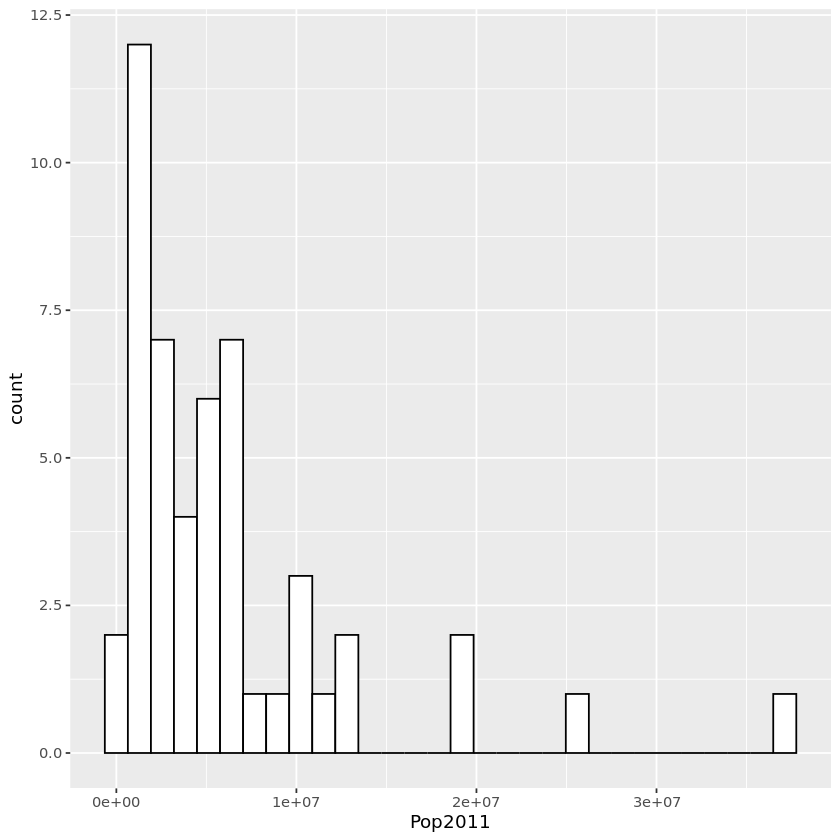

In [0]:
#Selecting the x axis as Pop2011 column of mergeDF
ggplot(mergeDF,aes(x=Pop2011))+
#Plotting a histogram with fill color as white and outline color as black
#Bins selected are 30
geom_histogram(na.rm=TRUE,bins=30,color="Black",fill="White")

<h6>Histogram for Murder Rate</h6>

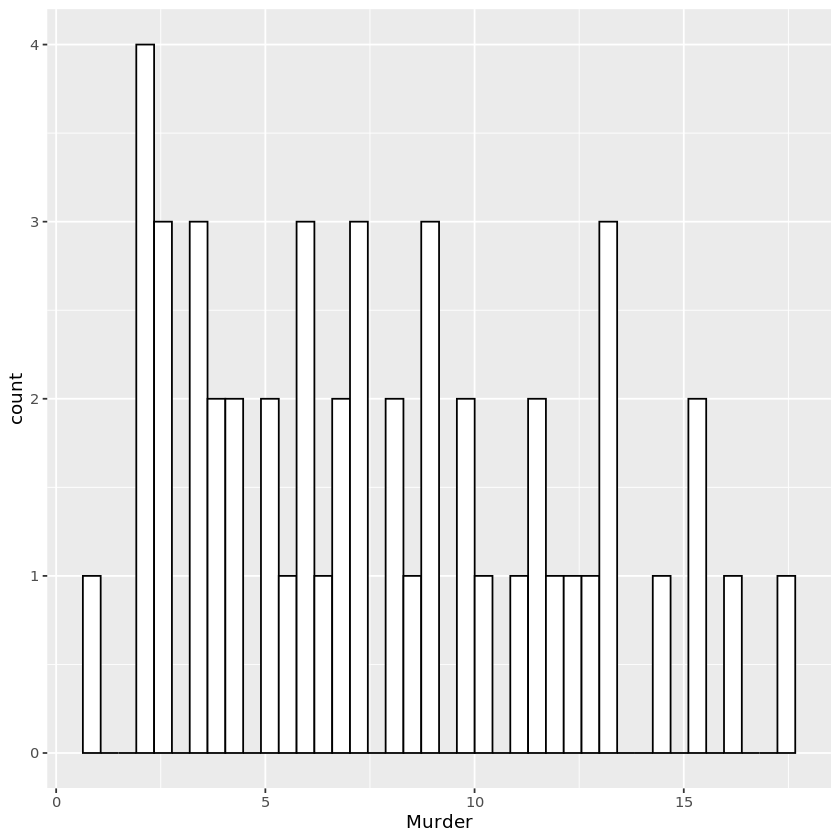

In [0]:
#Selecting the x axis as Pop2011 column of mergeDF
ggplot(mergeDF,aes(x=Murder))+
#Plotting a histogram with fill color as white and outline color as black
#Bins selected are 30
geom_histogram(na.rm=TRUE,bins=40,color="Black",fill="White")

<h6>Histogram for Assault</h6>

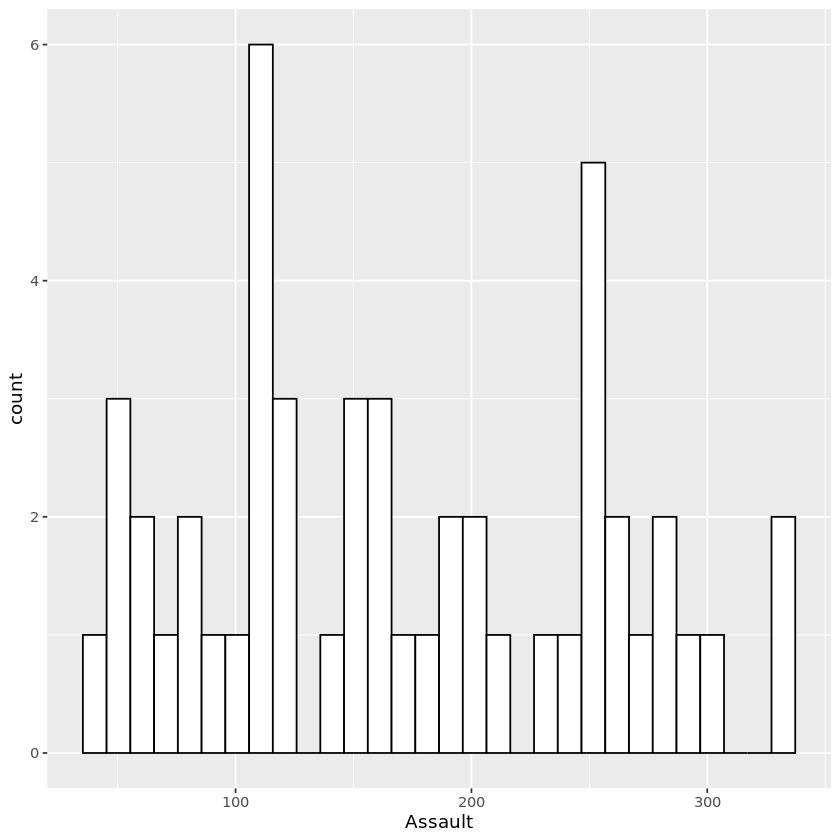

In [0]:
#Selecting the x axis as Pop2011 column of mergeDF
ggplot(mergeDF,aes(x=Assault))+
#Plotting a histogram with fill color as white and outline color as black
#Bins selected are 30
geom_histogram(na.rm=TRUE,bins=30,color="Black",fill="White")

<h6>Histogram for Rape</h6>

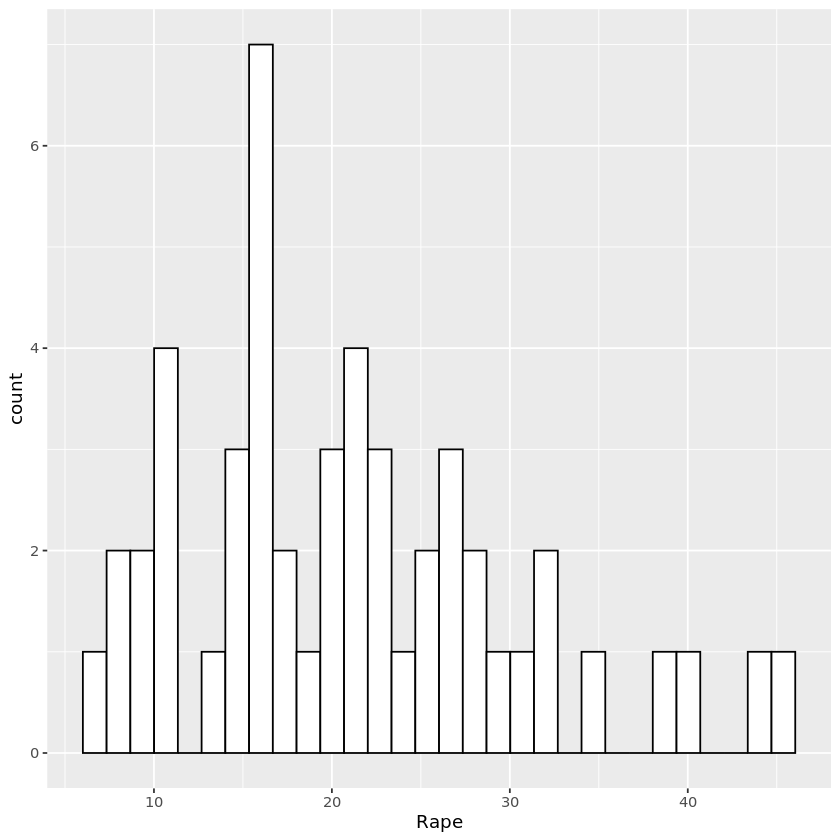

In [0]:
#Selecting the x axis as Pop2011 column of mergeDF
ggplot(mergeDF,aes(x=Rape))+
#Plotting a histogram with fill color as white and outline color as black
#Bins selected are 30
geom_histogram(na.rm=TRUE,bins=30,color="Black",fill="White")

<h3>C.	Create a boxplot for the Pop2011, and a different boxplot for the murder rate.</h3>

In [0]:
#Making a object of ggplot with dataset reference of mergeDF
plt = ggplot(mergeDF)

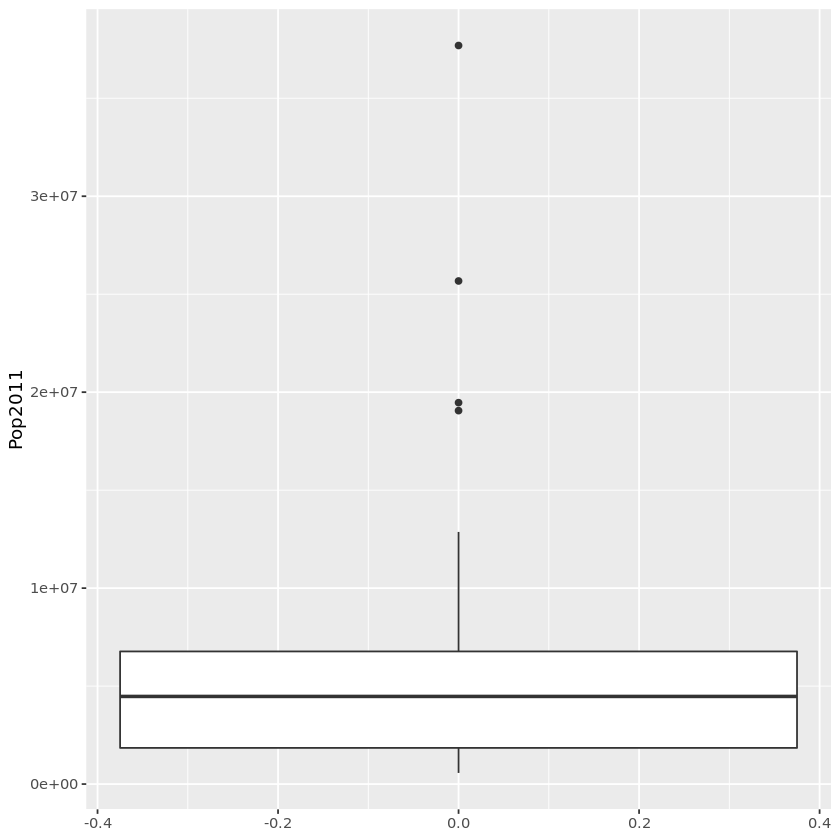

In [0]:
#using the previouslt created plt object to plot box plot with y axis as Pop2011
plt+geom_boxplot(aes(y=Pop2011))

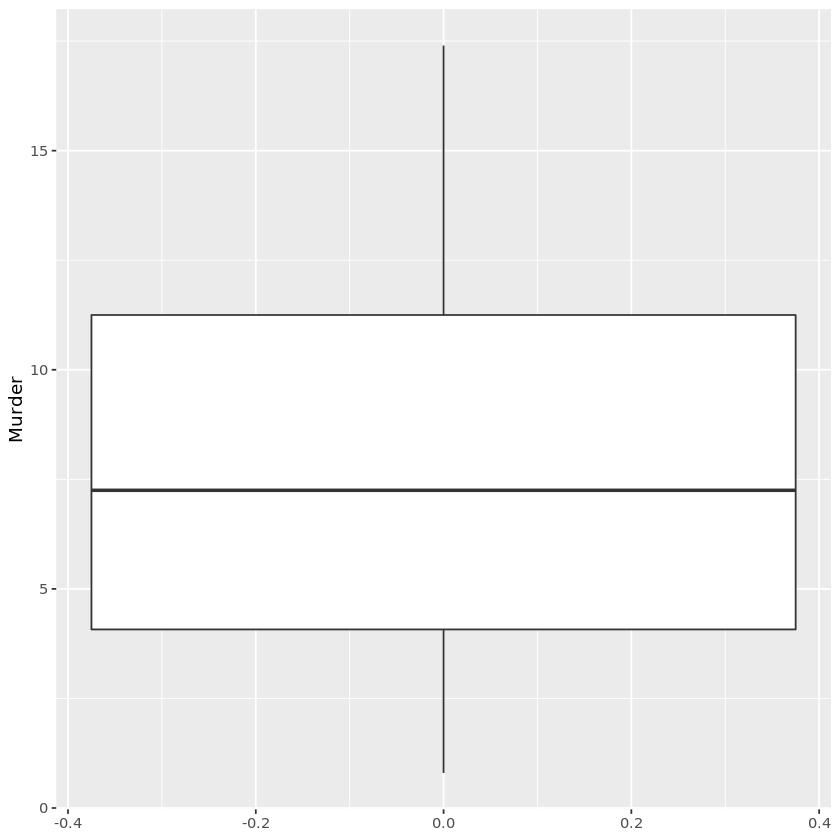

In [0]:
#using the previouslt created plt object to plot box plot with y axis as Murder
plt+geom_boxplot(aes(y=Murder))

<h3>D.	Create a block comment explaining which visualization (boxplot or histogram) you thought was more helpful (explain why)</h3>

Ans: According to me, box plot is more helpful since it provides bunch of information. We can derive the all three quartiles value and median. The two whiskers at both end gives us the extremes of the data. Also, we can know about what is the range where most of the data is accumulated.

<h2>Step 2: Which State had the Most Murders – bar charts</h2>

<h3>A.	Calculate the number of murders per state
a.	Hint: use the population and murder rate percentage from your new dataframe</h3>

In [0]:
#Creating a new column as NumbersMurders by multiplying the Pop2011 column and murder rate. 
#This will give us the number of murders per state
mergeDF["NumberMurders"] = mergeDF["Pop2011"]*mergeDF["Murder"]

In [0]:
#Displaying the stateName and number of murders
mergeDF[,c("stateName","NumberMurders")]

stateName,NumberMurders
<chr>,<dbl>
Alabama,63396168.0
Alaska,7227180.0
Arizona,52508290.5
Arkansas,25854215.2
California,339227208.0
Colorado,40422688.4
Connecticut,11816339.7
Delaware,5352096.5
Florida,293486146.8


<h3>B.	Generate a bar chart, with the number of murders per state
Hint: use the geom_col() function</h3>

In [0]:
#Creating a reference to the ggplot with dataset as mergeDF dataframe
plt = ggplot(mergeDF)

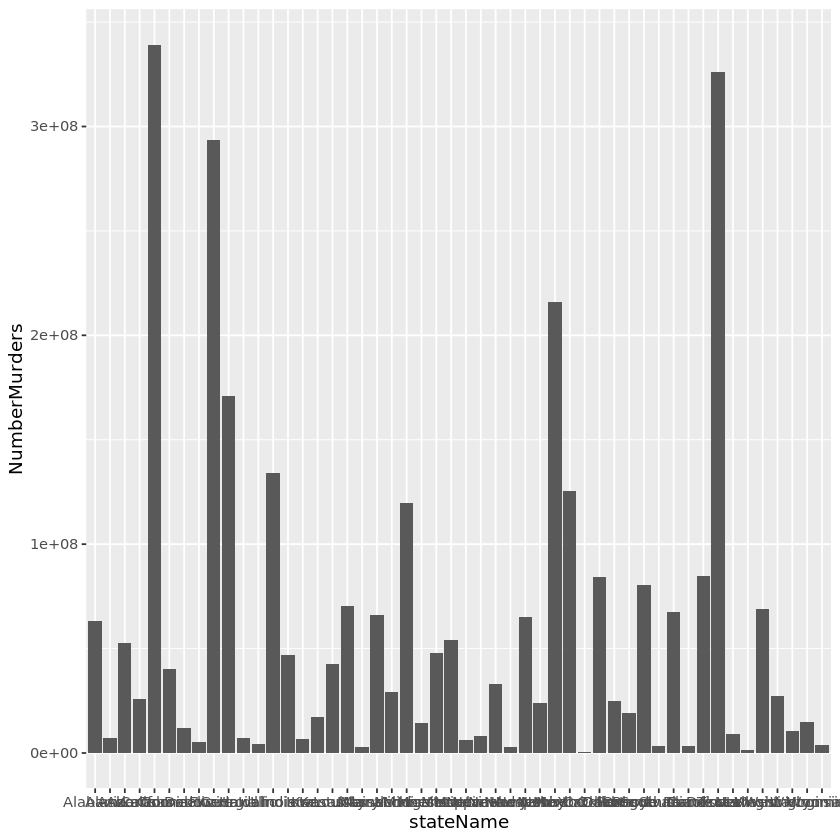

In [0]:
#Generating a bar chart with statename as x-axis and Number of Murders as y-axis
plt+geom_col(aes(y=NumberMurders,x=stateName))

<h3>C.	Generate a bar chart, with the number of murders per state. Rotate text (on the X axis), so we can see x labels, also add a title named “Total Murders”.
    
a.	Hint: use theme(axis.text.x = element_text(angle = 90, hjust = 1))</h3>

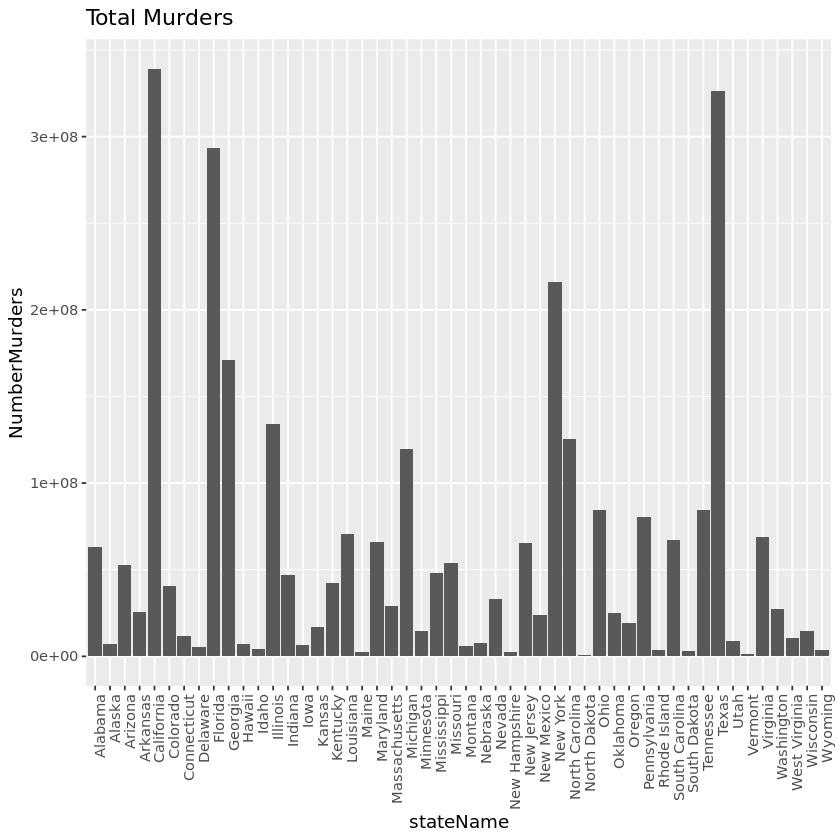

In [0]:
#creating a bar chart with statename on x-axis and number of murders per state on y-axis
plt+geom_col(aes(y=NumberMurders,x=stateName))+
#using theme to rotate the labels of x-axis by 90 degree
theme(axis.text.x=element_text(angle=90,hjust=1))+
#using ggtitle to create a title for the plot
ggtitle("Total Murders")

<h3>D.	 
    Generate a new bar chart, the same as in the previous step, but also sort the x-axis by the murder rate from low to high</h3>



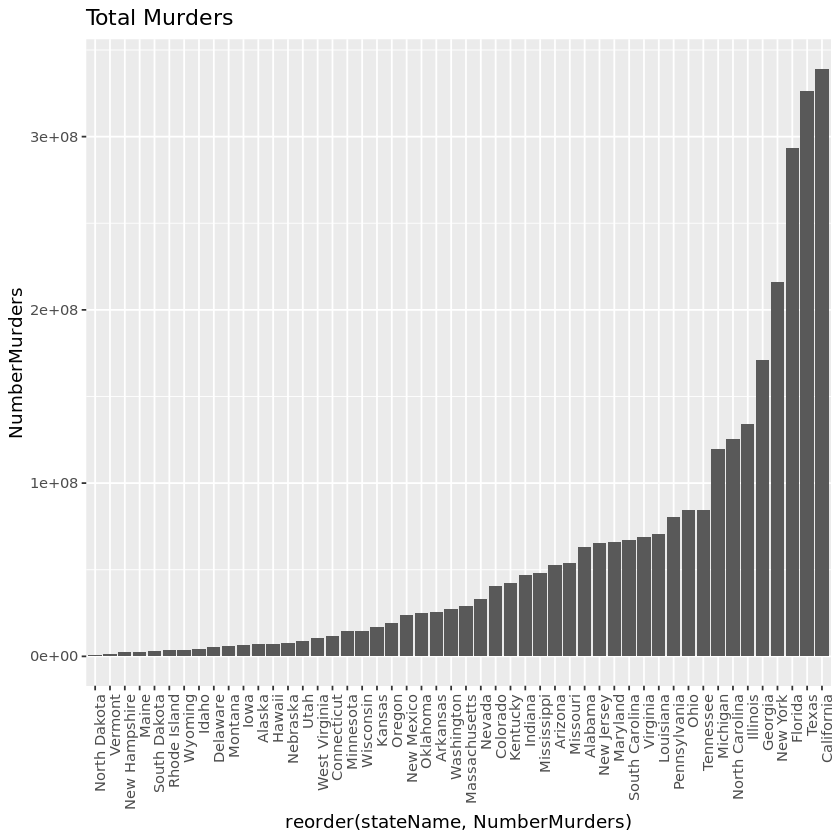

In [0]:
#creating a bar chart with statename on x-axis and number of murders per state on y-axis
#Also reordering the statename from low to high using reorder function
plt+geom_col(aes(y=NumberMurders,x=reorder(stateName,NumberMurders),group=1))+
#using theme to rotate the labels of x-axis by 90 degree
theme(axis.text.x=element_text(angle=90,hjust=1))+
#using ggtitle to create a title for the plot
ggtitle("Total Murders")

<h3>E. Generate a third bar chart, the same as the previous step, but also showing UrbanPop as the color of the bar</h3>

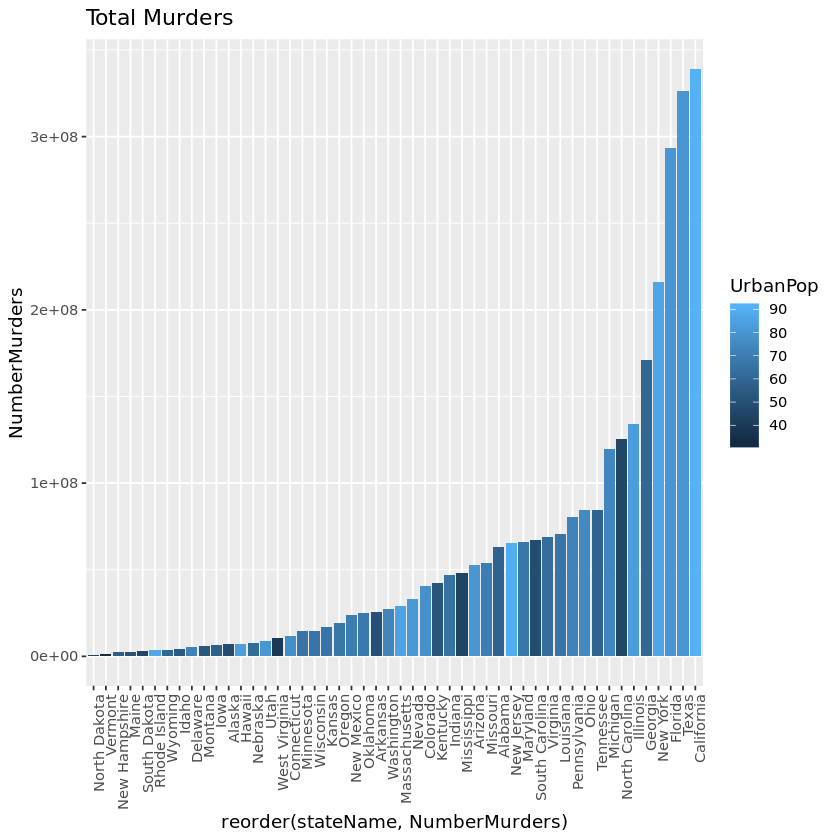

In [0]:
#creating a bar chart with statename on x-axis and number of murders per state on y-axis
#Also reordering the statename from low to high using reorder function
#Filling the color on the basis of UrbanPop
plt+geom_col(aes(y=NumberMurders,x=reorder(stateName,NumberMurders),group=1,fill=UrbanPop))+
#using theme to rotate the labels of x-axis by 90 degree
theme(axis.text.x=element_text(angle=90,hjust=1))+
#using ggtitle to create a title for the plot
ggtitle("Total Murders")

<h2>Step 3: Explore Murders – scatter chart</h2>

<h3>A. Generate a scatter plot – have Pop2011 on the X axis, the UrbanPop on the y axis, and the size & color represent the number of murders. </h3>

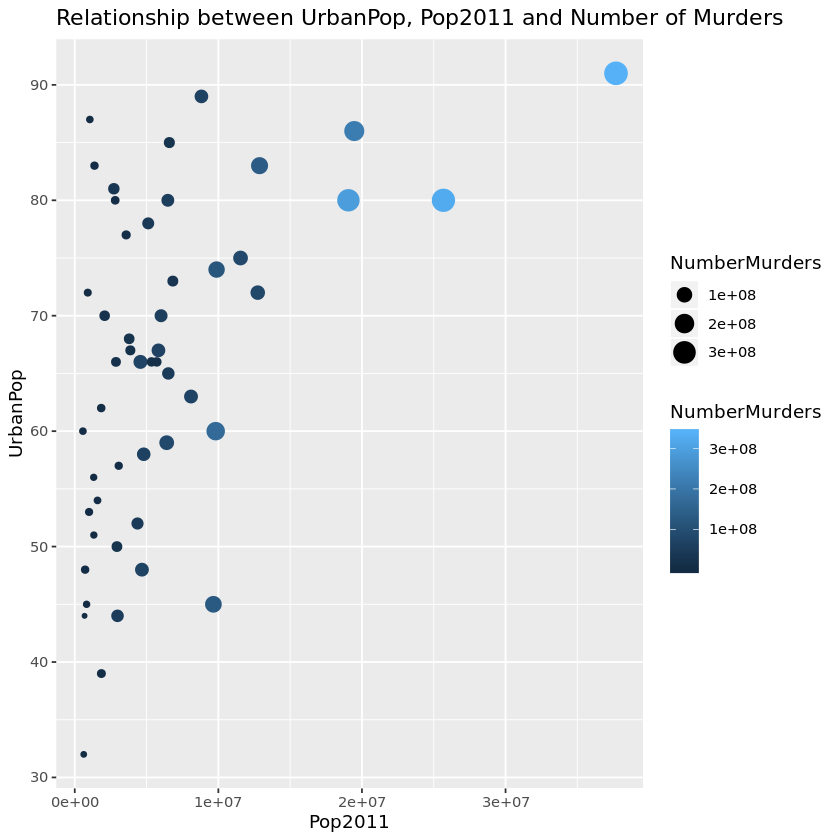

In [0]:
plt+geom_point(aes(x=Pop2011,y=UrbanPop,color=NumberMurders,size=NumberMurders))+
ggtitle("Relationship between UrbanPop, Pop2011 and Number of Murders")